# TRD-662

In [1]:
%use hyper-collate(1.3.5-SNAPSHOT-10)

Welcome to HyperCollate 1.3.5-SNAPSHOT-10
Using GraphViz: dot - graphviz version 2.40.1 (20161225.0304)



## The use case, with the original whitespace after the imediate &lt;del&gt;

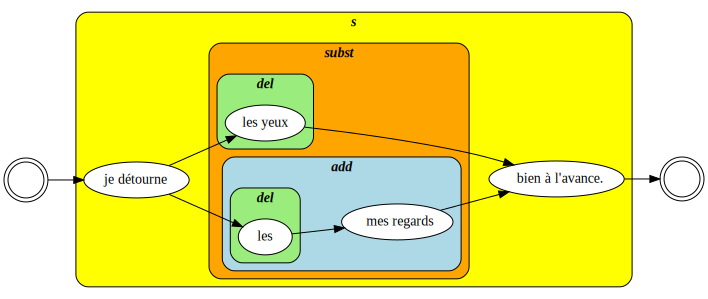

In [2]:
val wA = HC.importXMLWitness("A", """
            <s>je détourne <subst><del>les yeux</del><add><del instant="true">les</del> mes regards</add></subst> bien à l'avance.</s>
            """.trimMargin())
val wB = HC.importXMLWitness("B", """
            <s>je détourne mes regards.</s>
            """.trimMargin())
wA.show()

### The new way of modeling the immediate deletion:

note that in this modeling, _les yeux, les_ and _mes regards_ can no longer be at the same height, even though they will be in the same column for the table visualizations.

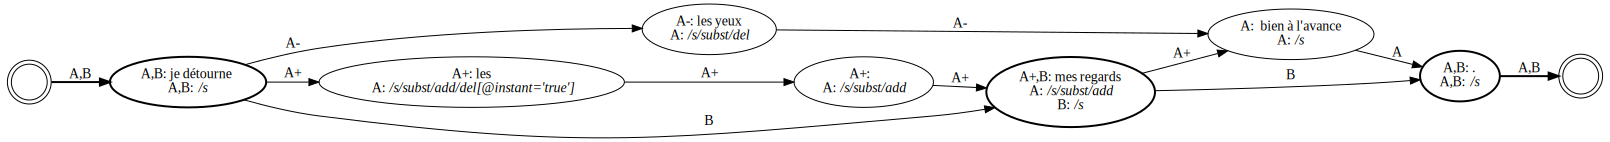

In [3]:
val cg = HC.collate(wA,wB)
cg.show(horizontal=true)

### By special handling of textnodes with immediate deletion and textnodes with just whitespace, the table visualizations stay the same:

In [4]:
cg.asASCIITable()

┌───┬────────────┬───────────────┬────────────────┬─┐
│[A]│            │[+] mes regards│                │ │
│   │            │[-] les        │                │ │
│   │je détourne │[-] les yeux   │bien à l'avance │.│
├───┼────────────┼───────────────┼────────────────┼─┤
│[B]│je détourne │mes regards    │                │.│
└───┴────────────┴───────────────┴────────────────┴─┘

In [5]:
cg.asHtml()

A,je détourne,les mes regardsles yeux,bien à l'avance,.
B,je détourne,mes regards,,.
